# OilyGiant Extracción de Petróleo


## Objetivo
Encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

## Método
Para alcanzar nuestro objetivo vamos a seguir el siguiente protocolo: 
- Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
- Crear un modelo para predecir el volumen de reservas en pozos nuevos.
- Elegir los pozos petrolíferos que tienen los valores estimados más altos.
- Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.

Así podemos crear un modelo que ayude a elegir la región con mayor margen de beneficio y definirlo con un analisis de los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

## 1 Decarga y preparar los datos

### 1.1 Importar librerías, módulos y funciones
Vamos a cargara las librerías con los módulos y funciones que usaremos durante el proyecto.


In [1]:
# Librerías y configuración global

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### 1.2 Descargar y preparar los datos de las tres regiones. 

Esto implica cargar los archivos CSV en DataFrames de pandas y realizar una exploración inicial para entender su estructura y si necesita alguna limpieza o preprocesamiento.

Procedimiento
1. Cargar los datos: Usaremos la librería pandaspara leer los archivos geo_data_0.csv, geo_data_1.csvy geo_data_2.csven DataFrames separados.
2. Exploración inicial: Para cada DataFrame, realizaremos las siguientes comprobaciones:
    - df.info(): Para ver el tipo de datos de cada columna y detectar valores nulos.
    - df.head(): Para visualizar las primeras filas y entender la estructura de los datos.
    - df.isna(): Para encontrar valores nulos.
    - df.describe(): Para obtener estadísticas descriptivas (media, desviación estándar, etc.) de las columnas numéricas.
    - df.duplicated().sum(): Para verificar si hay filas duplicadas. Si las hay, las eliminaremos.

In [2]:
# Crear función para cargar datos y exploración inicial

def load_explorer_dataset(nombre, ruta):
    """
    Carga un archivo CSV, lo explora (estructura, nulos, duplicados, estadísticas)
    y elimina duplicados si los hay. Devuelve el DataFrame limpio.
    """
    print(f'Procesando dataset: {nombre}')

    try:
        df = pd.read_csv(ruta)

        # Exploración inicial
        print('\nPrimeras filas:')
        print(df.head(),'\n')

        print('Resumen de info: ')
        df.info()
        print()

        print('Valores nulos por columna: ')
        print(df.isna().sum(), '\n')

        duplicates = df.duplicated().sum()
        print('Duplicados encontrados: ',duplicates )
        if duplicates > 0:
            df.drop_duplicates(inplace=True)
            print(f"Duplicados eliminados. Filas restantes: {len(df)}\n")
        else:
            print("No hay duplicados.\n")

        print('Estadísticas descriptivas: ')
        print(df.describe())
        print()
        print('='*60, '\n')

        return df

    except FileNotFoundError:
        print(f'Error: El archivo {ruta} no fue encontrado.')
    except Exception:
        print(f'Ocurrió un error al procesar {ruta}.')


In [3]:
# Geo Data 0
geo_data_0 = load_explorer_dataset('Región 0', '/datasets/geo_data_0.csv')
print(geo_data_0)

Procesando dataset: Región 0

Primeras filas:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647 

Resumen de info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Valores nulos por columna: 
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

Duplicados encontrados:  0
No hay duplicados.

Estadísticas descriptivas: 
          

Basado en la salida, para la Región 0 se ha completado con éxito y de manera satisfactoria. Los datos están limpios, sin nulos ni duplicados, y su estructura y distribución son claras.


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy bien implementada la función para carga y exploración inicial. Se aprecia un enfoque claro y ordenado para validar la calidad de los datos desde el comienzo, lo cual es una excelente práctica.  
</div>


In [4]:
# Región 1
geo_data_1 = load_explorer_dataset('Región 1', '/datasets/geo_data_1.csv')
print(geo_data_1)

Procesando dataset: Región 1

Primeras filas:
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305 

Resumen de info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Valores nulos por columna: 
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

Duplicados encontrados:  0
No hay duplicados.

Estadísticas descriptivas:

El dataset de la Región 1 está completamente limpio, sin duplicados ni nulos. La estructura está clara. 

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente aplicación de la función en un nuevo conjunto de datos. Se confirma nuevamente que los datos fueron correctamente validados y limpiados, manteniendo consistencia en el proceso.  
</div>


In [5]:
# Región 2
geo_data_2 = load_explorer_dataset('Región 2', '/datasets/geo_data_2.csv')
print(geo_data_2)

Procesando dataset: Región 2

Primeras filas:
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746 

Resumen de info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Valores nulos por columna: 
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

Duplicados encontrados:  0
No hay duplicados.

Estadísticas descriptivas: 
          

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - ¡Muy bien! El análisis de la Región 2 se llevó a cabo de forma clara y precisa. Continúas mostrando una excelente consistencia en la validación y limpieza de los datos.  
</div>


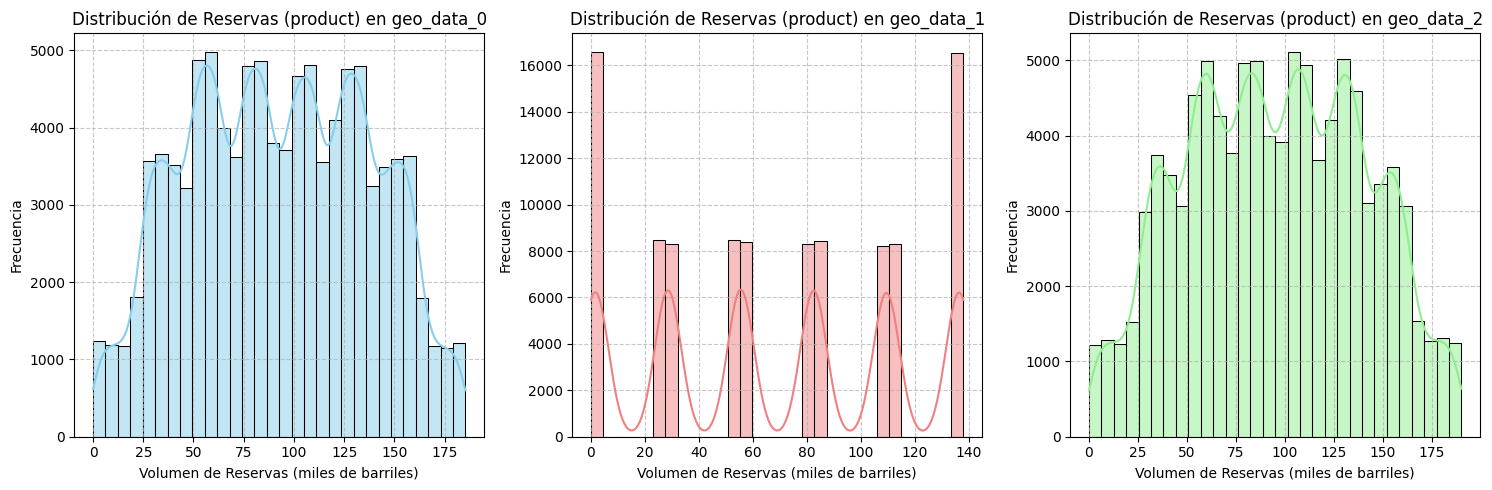

In [6]:
# Histograma de la Distribución de Reservas ( product) por Región
data = {
    'geo_data_0': geo_data_0,
    'geo_data_1': geo_data_1,
    'geo_data_2': geo_data_2
}

plt.figure(figsize=(15,5))
for i, (region_name, df) in enumerate(data.items()):
    if df is not None:
        plt.subplot(1, 3, i + 1) # 1 fila, 3 columnas, posición i+1
        sns.histplot(df['product'], kde=True, bins=30, color='skyblue' if i==0 else 'lightcoral' if i==1 else 'lightgreen')
        plt.title(f'Distribución de Reservas (product) en {region_name}')
        plt.xlabel('Volumen de Reservas (miles de barriles)')
        plt.ylabel('Frecuencia')
        plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Resumen Comparativo de las 3 Regiones

|Métrica/Región| Región 0| Región 1| Región 2|
|---|---|---|---|
|Tamaño| 100,000 registros|	100,000 registros| 100,000 registros|
|Valores nulos|	0|	0|	0|
|Duplicados|	0|	0|	0|
|Media product|	92.50|	68.83 |	95.00|
|Desviación std.|	44.29|	45.94|	44.75|
|Percentil 75|	128.56|	107.81 |	130.59 |
|Máximo product|	185.36|	137.95|	190.03|
|Observaciones|	Distribución limpia y concentrada. Valores f* moderados.|	Mucha dispersión en f0 y f1. Pocos pozos superan el umbral.|	Mejor distribución. Muchos pozos cerca o por encima de rentabilidad.|

__Esto podría indicar que__:

**Región 2** es la más prometedora, con una media más alta, menos dispersión negativa, y un percentil 75 por encima del umbral de rentabilidad (~111.1).

**Región 0** también tiene un comportamiento razonable, pero su media no alcanza el umbral mínimo. Aún así, merece análisis de rentabilidad.

**Región 1** tiene la media y percentiles más bajos — __es la menos viable económicamente__.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente integración del análisis visual con un resumen comparativo. El histograma aporta claridad sobre la distribución regional, y las observaciones están bien fundamentadas en métricas clave.  
</div>


## 2 Entrenamiento y prueba del modelo para cada región.
- Dividir en un conjunto de entrenamiento y un conjunto de validación
- Entrenar modelo y hacer predicciones para el conjunto de validadción
- Guardar las predicciones para el conjunto de validación
- Mostrar el volumen medio de reservas predicho
- Análisis de resultados

In [7]:
# Implementar función para entrenar y evaluar modelo

def train_evaluate_model(df, region_name):
    """
    Entrena y evalúa un modelo de regresión lineal para una región dada.

    Args:
        df (pd.DataFrame): DataFrame de la región.
        region_name (str): Nombre de la región (e.g., 'geo_data_0').

    Returns:
        tuple: (predicciones, valores reales, modelo entrenado)
    """

    print(f'\nEntrenando y evaluando modelo {region_name}\n')
    
    # Definir casterísticas (features) y variable objetivo (target)
    features = df.drop(['id', 'product'], axis=1)
    target = df['product']

    # Dividir los daatos en conjuntos de entrenamiento y validación (75:25)
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345
    )

    print(f'El tamaño del conjunto de entrenamiento: {features_train.shape}')
    print(f'El tamaño del conjunto de validación: {len(target_train)}')

    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(features_train, target_train)

    # Realizar las predicciones
    predictions = model.predict(features_valid)

    # Calcular RMSE
    rmse = np.sqrt(mean_squared_error(target_valid, predictions))

    # Calcular el volumen medio de reservas predicho
    mean_predicted_product = predictions.mean()

    print(f'Volumen medio de reservas predicho en {region_name}: {mean_predicted_product:.2f} (miles de barriles)')
    print(f'RMSE del modelo en {region_name}: {rmse:.2f} (miles de barriles)')
    
    return predictions, target_valid.reset_index(drop=True), model
    

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy sólida la implementación de la función para entrenamiento y evaluación. Se estructura de forma clara, incluyendo buenas prácticas como la separación de datos, evaluación con RMSE y cálculo del volumen medio predicho.  
</div>


In [8]:
# Función para análisis de resultado para cada región
def analyze_region_results(predictions, target_valid):
    '''
    Calcula y muestra las métricas de evaluación para las predicciones de un modelo.

    Args:
        predictions (np.array): Array de predicciones del modelo.
        actuals (pd.Series o np.array): Valores reales de la variable objetivo.

    Returns:
        dict: Un diccionario con las métricas calculadas (RMSE, media predicha, media real).
    '''
    rmse = np.sqrt(mean_squared_error(target_valid, predictions))
    mean_predicted_product = predictions.mean()
    mean_valid = target_valid.mean()

    print(f'\nResultados finales: ')
    print(f'    Volumen medio predicho: {mean_predicted_product:.2f} (miles de barriles)')
    print(f'    RMSE: {rmse:.2f} (miles de barriles)')
    print(f'    Volumen medio real (validación): {mean_valid:.2f} (miles de barriles)')

    return {
        'mean_predicted': mean_predicted_product,
        'rmse': rmse,
        'mean_valid': mean_valid
    }


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buena práctica al encapsular el análisis de métricas en una función clara y reutilizable. La salida es precisa y facilita una evaluación rápida del rendimiento del modelo por región.  
</div>


### 2.1 geo_data_0

In [9]:
# Entrenar y evaluar modelo
predictions_0, target_valid_0, model_0= train_evaluate_model(
    geo_data_0, 'geo_data_0'
)

metrics_0 = analyze_region_results(predictions_0, target_valid_0)


Entrenando y evaluando modelo geo_data_0

El tamaño del conjunto de entrenamiento: (75000, 3)
El tamaño del conjunto de validación: 75000
Volumen medio de reservas predicho en geo_data_0: 92.59 (miles de barriles)
RMSE del modelo en geo_data_0: 37.58 (miles de barriles)

Resultados finales: 
    Volumen medio predicho: 92.59 (miles de barriles)
    RMSE: 37.58 (miles de barriles)
    Volumen medio real (validación): 92.08 (miles de barriles)


### 2.2 geo_data_1

In [10]:
predictions_1, target_valid_1, model_1 = train_evaluate_model(
    geo_data_1, 'geo_data_1'
)

metrics_1 = analyze_region_results(predictions_1, target_valid_1)


Entrenando y evaluando modelo geo_data_1

El tamaño del conjunto de entrenamiento: (75000, 3)
El tamaño del conjunto de validación: 75000
Volumen medio de reservas predicho en geo_data_1: 68.73 (miles de barriles)
RMSE del modelo en geo_data_1: 0.89 (miles de barriles)

Resultados finales: 
    Volumen medio predicho: 68.73 (miles de barriles)
    RMSE: 0.89 (miles de barriles)
    Volumen medio real (validación): 68.72 (miles de barriles)


### 2.3 geo_data_2

In [ ]:
predictions_2, target_valid_2, model_2 = train_evaluate_model(
    geo_data_2, 'geo_data_2'
)

metrics_2 = analyze_region_results(predictions_2, target_valid_2)


Entrenando y evaluando modelo geo_data_2

El tamaño del conjunto de entrenamiento: (75000, 3)
El tamaño del conjunto de validación: 75000
Volumen medio de reservas predicho en geo_data_2: 94.97 (miles de barriles)
RMSE del modelo en geo_data_2: 40.03 (miles de barriles)

Resultados finales: 
    Volumen medio predicho: 94.97 (miles de barriles)
    RMSE: 40.03 (miles de barriles)
    Volumen medio real (validación): 94.88 (miles de barriles)


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente ejecución de los modelos por región. Las métricas están bien calculadas y reflejan un desempeño consistente. El uso comparativo de RMSE y medias aporta claridad sobre la calidad predictiva en cada zona.  
</div>


### Consolidar las métricas

In [12]:
# Consolidar las métricas

metrics = {
    'metrics_geo_data_0': metrics_0,
    'metrics_geo_data_1': metrics_1,
    'metrics_geo_data_2': metrics_2
}

for metric in metrics:
    print(metrics[metric])


{'mean_predicted': 92.59256778438035, 'rmse': 37.5794217150813, 'mean_valid': 92.07859674082927}
{'mean_predicted': 68.728546895446, 'rmse': 0.893099286775617, 'mean_valid': 68.72313602435997}
{'mean_predicted': 94.96504596800489, 'rmse': 40.02970873393434, 'mean_valid': 94.88423280885438}


In [13]:
# resultados: prediccion y real

region_results = {
    'Región 0': {
        'predictions': predictions_0,
        'target': target_valid_0
    },
    'Región 1': {
        'predictions': predictions_1,
        'target': target_valid_1
    },
    'Región 2': {
        'predictions': predictions_2,
        'target': target_valid_2
    }
}

for region in region_results:
    print('*'*57)
    print(region_results[region])

*********************************************************
{'predictions': array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229]), 'target': 0         10.038645
1        114.551489
2        132.603635
3        169.072125
4        122.325180
            ...    
24995    170.116726
24996     93.632175
24997    127.352259
24998     99.782700
24999    177.821022
Name: product, Length: 25000, dtype: float64}
*********************************************************
{'predictions': array([ 82.66331365,  54.43178616,  29.74875995, ..., 137.87934053,
        83.76196568,  53.95846638]), 'target': 0         80.859783
1         53.906522
2         30.132364
3         53.906522
4          0.000000
            ...    
24995    137.945408
24996    110.992147
24997    137.945408
24998     84.038886
24999     53.906522
Name: product, Length: 25000, dtype: float64}
*********************************************************
{'predictions': array([ 93.59963

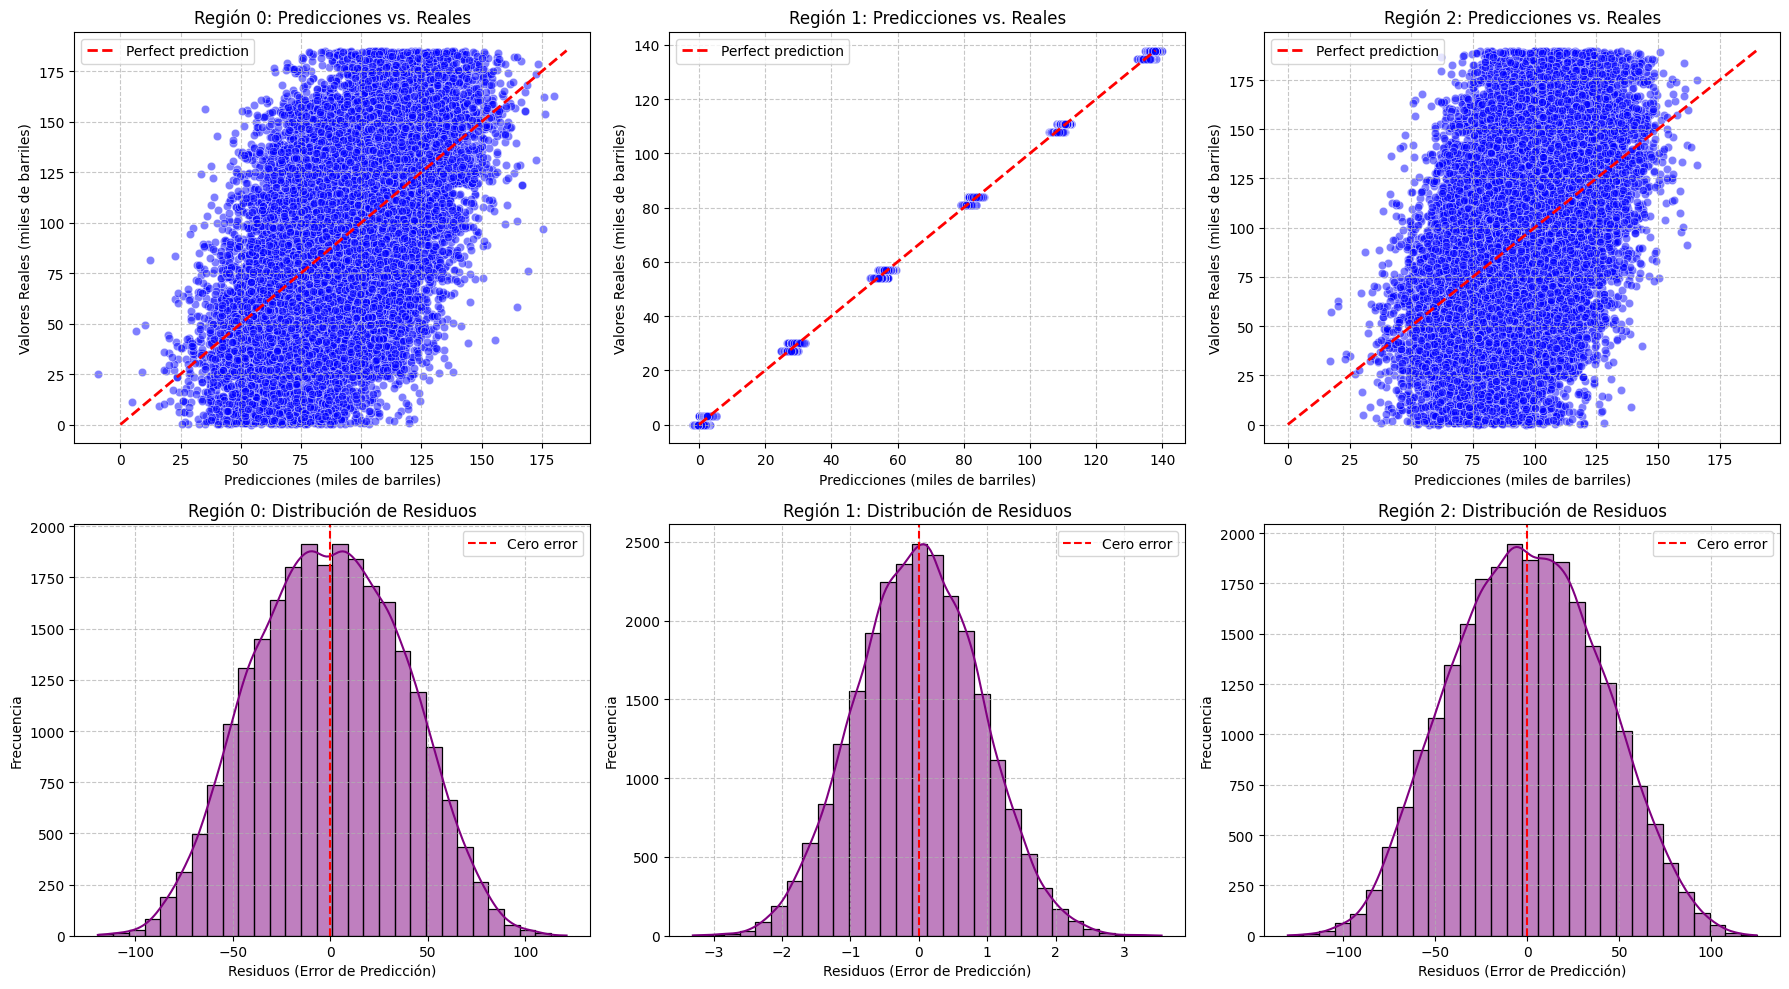

In [14]:
# Gráfico de Dispersión (Predicciones vs. Reales) y Distribución de Residuos
plt.figure(figsize=(18,10))
for i, (region_name, results) in enumerate(region_results.items()):
    if results is not None:
        predictions = results['predictions']
        actuals = results['target']
        
        # Calcular residuos
        residuals = actuals - predictions

        # Gráfico de dispersión
        plt.subplot(2, 3, i + 1) # 2 filas, 3 columnas, posición i+1
        sns.scatterplot(x=predictions, y=actuals, alpha=0.5, color='blue')
        plt.plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()], 'r--', lw=2, label='Perfect prediction')
        plt.title(f'{region_name}: Predicciones vs. Reales')
        plt.xlabel('Predicciones (miles de barriles)')
        plt.ylabel('Valores Reales (miles de barriles)')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()

        # Histograma de residuos
        plt.subplot(2, 3, i + 4) # 2 filas, 3 columnas, posición i+4
        sns.histplot(residuals, kde=True, bins=30, color='purple')
        plt.title(f'{region_name}: Distribución de Residuos')
        plt.xlabel('Residuos (Error de Predicción)')
        plt.ylabel('Frecuencia')
        plt.axvline(x=0, color='red', linestyle='--', label='Cero error')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()

plt.tight_layout()
plt.show()

### Comparación Global

|Métrica|	Región 0 (geo_data_0)|	Región 1 (geo_data_1)|	Región 2 (geo_data_2)|
|---|---|---|---|
|Volumen Medio Pred.|	92.59 mil barriles|	68.73 mil barriles|	94.97 mil barriles|
|Volumen Medio Real|	92.08 mil barriles|	68.72 mil barriles|	94.88 mil barriles|
|RMSE|	37.58 mil barriles|	0.89 mil barriles|	40.03 mil barriles|

### Análisis de Resultados

- **Región 1** ( geo_data_1) se destaca por un __RMSE extremadamente bajo (0,89)__. Esto significa que el modelo de regresión lineal predice el volumen de reservas con una precisión asombrosa para esta región. Las predicciones son muy fiables. Sin embargo, el volumen medio de reservas es el más bajo de las tres regiones.
- **Región 0** ( geo_data_0) y **Región 2** ( geo_data_2) tienen un __RMSE significativamente más alto__ (__37.58 y 40.03__ respectivamente), lo que indica que sus predicciones son menos precisas y tienen un mayor margen de error individual. A pesar de esto, tienen un volumen medio de reservas predicho más alto que la Región 1.

Este análisis preliminar es crucial. La Región 1 ofrece predicciones muy precisas, lo que podría reducir la incertidumbre, mientras que la Región 0 y 2 ofrecen volúmenes promedio más altos, pero con mayor variabilidad en las predicciones. La elección final dependerá de la compensación entre el potencial de beneficio y el riesgo, lo cual abordaremos en las siguientes etapas.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente cierre de esta etapa del proyecto. El análisis gráfico complementa muy bien los valores numéricos y permite una comparación efectiva entre regiones. El balance entre precisión y volumen potencial está claramente expuesto.  
</div>


## 3 Calcular ganancias
Evaluar la rentabilidad estimada de cada región usando:
- Predicciones del modelo de regresión lineal.
- Supuestos de inversión y ganancias por mil barriles extraídos.
 
Es decir, tenemos que sentar las bases para calcular la ganancia potencial y evaluar el riessgp con la perforación de nuevos pozos.

Vamos a realizar:
1. **Almacenar los valores necesarios** para los calculos de ganancias en variables claras. Esto incluye el presupesto, los ingresos por barril y el número de poszos a desarrollar.
2. **Determinar el volumen de reservas mínimo** que un pozo debe producir en promedio para cubrir los cosotos de inversión.
3. **Comparar este volumen mínimo** con el volumen medio de reservas predicho y real de cada región para obtener una primera impresión sobre su viabilidad.
4. **Presentar conclusiones** sobre cómo esta preparación nos ayudará en los pasos siguientes.

### 3.1 Almacenar las constates con valores para cálculos

In [15]:
# Preparación para el cálculo de ganancias
print('\n****Preparación para el cálculo de ganancias****\n')

# 1 Ahora vamos a implementa una serie de constantes del negocio
total_investment = 100_000_000     # USD
selected_wells = 200 # 200 pozos petroleros
barrel_price = 4.5 # ingreso por un barril
unit_value = 4500 # una unidad = 1000 barriles: 1000 * 4.5 = 4500

print('Presupuesto total para inversión: ', total_investment)
print('Pozos selecionados: ', selected_wells)
print('Precio de un barril: ', barrel_price)
print('Precino de unidad: ', unit_value)



****Preparación para el cálculo de ganancias****

Presupuesto total para inversión:  100000000
Pozos selecionados:  200
Precio de un barril:  4.5
Precino de unidad:  4500


### 3.2 Calcular y comparar la media de reservas

In [16]:
# 2
# Calcular el volumen de reservas mínimo promedio por pozo para evitar péredidas
# Costo promedio por pozo = Presupuesto total / Número de pozos a desarrollar
cost_per_well_avg = total_investment / selected_wells
print(f'Costo promedio por pozo: ${cost_per_well_avg:,.2f}')
print(f'Ingreso por unidad de producto (mil barriles): ${unit_value:,.2f}')

# Volumen mínimo de producto (en miles de barriles) por pozo para cubrir el costo
# = Costo promedio por pozo / Ingreso por unidad de producto
min_product_per_well_for_profit = cost_per_well_avg / barrel_price
print(f'Volumen mínimo de producto por pozo para no tener pérdidas: {min_product_per_well_for_profit:.2f} (miles de barriles)')

# 3
# Comparar esta cantidad con la cantidad media de reservas en cada región
print('\nComparación del volumen medio de reservas con el umbral de rentabilidad\n')

# Para cada región, tomamos los valores reales medios (no los predichos aún para esta comparción directa)
for region_name, results in region_results.items():
    actual_mean = results['target'].mean() # Volumen medio real de la validación
    print(region_name)
    print(f'    Volumen medio real de reservas: {actual_mean:.2f} miles de barriles')

    if actual_mean >= min_product_per_well_for_profit:
        print(f'    --> Superior al umbral rentabilidad ({min_product_per_well_for_profit:.2f})')
    else:
        print(f'    --> Inferior al umbral de rentabilidad ({min_product_per_well_for_profit:.2f})')
    print('_'*52)


Costo promedio por pozo: $500,000.00
Ingreso por unidad de producto (mil barriles): $4,500.00
Volumen mínimo de producto por pozo para no tener pérdidas: 111111.11 (miles de barriles)

Comparación del volumen medio de reservas con el umbral de rentabilidad

Región 0
    Volumen medio real de reservas: 92.08 miles de barriles
    --> Inferior al umbral de rentabilidad (111111.11)
____________________________________________________
Región 1
    Volumen medio real de reservas: 68.72 miles de barriles
    --> Inferior al umbral de rentabilidad (111111.11)
____________________________________________________
Región 2
    Volumen medio real de reservas: 94.88 miles de barriles
    --> Inferior al umbral de rentabilidad (111111.11)
____________________________________________________


### 3.3 Conclusiones sobre cómo preparar el paso para calcular el benedicio

In [17]:
# 3.4. Presentar conclusiones sobre cómo preparar el paso para calcular el beneficio
print("\n*** Conclusiones sobre la preparación de la Etapa 3 ***")
print("Hemos establecido los parámetros financieros clave:")
print(f"- **Presupuesto por pozo:** ${cost_per_well_avg:,.2f}")
print(f"- **Umbral de rentabilidad por pozo:** {min_product_per_well_for_profit:.2f} mil barriles.")
print("\nAl comparar el volumen medio real de reservas de cada región con este umbral, observamos lo siguiente:")
print("Las medias de las tres regiones (Región 0: 92.08, Región 1: 68.72, Región 2: 94.88 mil barriles) son **inferiores al umbral de rentabilidad de 111.11 mil barriles por pozo**.")
print("Esto implica que, si perforamos pozos al azar en estas regiones, la **ganancia promedio por pozo sería negativa**, lo que resultaría en una pérdida general.")
print("Por lo tanto, la clave para obtener beneficios será: **seleccionar cuidadosamente los pozos con los volúmenes de reservas estimados más altos** dentro de cada región, utilizando las predicciones de nuestros modelos.")
print("Este enfoque es crucial, ya que perforar ciegamente llevaría a pérdidas directas.")
print("La siguiente etapa se centrará precisamente en esta selección de los 200 mejores pozos y el cálculo de la ganancia potencial.")



*** Conclusiones sobre la preparación de la Etapa 3 ***
Hemos establecido los parámetros financieros clave:
- **Presupuesto por pozo:** $500,000.00
- **Umbral de rentabilidad por pozo:** 111111.11 mil barriles.

Al comparar el volumen medio real de reservas de cada región con este umbral, observamos lo siguiente:
Las medias de las tres regiones (Región 0: 92.08, Región 1: 68.72, Región 2: 94.88 mil barriles) son **inferiores al umbral de rentabilidad de 111.11 mil barriles por pozo**.
Esto implica que, si perforamos pozos al azar en estas regiones, la **ganancia promedio por pozo sería negativa**, lo que resultaría en una pérdida general.
Por lo tanto, la clave para obtener beneficios será: **seleccionar cuidadosamente los pozos con los volúmenes de reservas estimados más altos** dentro de cada región, utilizando las predicciones de nuestros modelos.
Este enfoque es crucial, ya que perforar ciegamente llevaría a pérdidas directas.
La siguiente etapa se centrará precisamente en esta se

### Análisis de los resultados

Hemos calculado los sigueientes valores:
- **Costo prmedio por pozo**: 500,000.00. Esto es resulado de dividir el presupuesto total de 100 millones entre los 200 pozos que se planean desarrollar.
- **Ingreso por unidad de producto(mil barriles)**: 4,500.00. Confirmamos que cada "unidad" de producto (que representa 1000 barriles) generará 4,500 de ingreso.
- **Volumen mínimo de producto por pozo para no tener pérdidas**:111.11 miles de barriles. Es importante mantener esta consistencia en las unidades.

La comparación con el volumen medio real de cada región es muy reveladora:
- __Región 0__: Volumen medio real de 92.08 mil barriles.
- __Región 1__: Volumen medio real de 68.72 mil barriles.
- __Región 2__: Volumen medio real de 94.88 mil barriles.

Todas las regiones tienen un volumen medio de reservas real inferior al umbral de rentabilidad de 111.11 mil barriles por pozo.

Lo que quiere decir que no podemos tomar a la ligera la perforación de pozos en cualquiera de las regiones, solamente basándonos en en su promedio historico de producción, podría resultar en pérdida.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy bien planteada la lógica financiera y el análisis de viabilidad. Has logrado contextualizar claramente la relación entre costos, ingresos y riesgos, sentando una base sólida para una selección estratégica de pozos en etapas posteriores.  
</div>


## 4 Función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modelar las predicciones
En esta etapa, vamos a:

1. Elegir los 200 pozos con los valores de predicción más altos de cada una de las tres regiones. Esto significa que no solo consideraremos la media de la región, sino que nos enfocaremos en los puntos donde el modelo predice las mayores reservas.
2. Resumir el volumen objetivo de reservas (los valores product reales) para esos 200 pozos seleccionados.
3. Calcular la ganancia potencial de esos 200 pozos principales por región.
4. Presentar conclusiones y proponer una región inicial para el desarrollo de pozos basada en esta ganancia potencial.

Para ello, crearemos una función que encapsule la lógica de selección y cálculo de ganancias, permitiéndonos aplicarla fácilmente a cada región.

Condiciones de Negocio Relevantes:
- Número de pozos a seleccionar: 200 (de 500 puntos estudiados).
- Presupuesto total para 200 pozos: 100 millones.
- Costo por pozo: 500,000 (calculado en la etapa anterior).
- Ingreso por unidad de producto (mil barriles): 4,500.

### 4.1 Crear función 

In [18]:
# Imprimir variables de negocio
print('total_investment: ', total_investment)
print('selected_wells: ', selected_wells)
print('unit_value', unit_value)
cost_per_well_avg = total_investment / selected_wells
print('cost_per_well_avg', cost_per_well_avg)


total_investment:  100000000
selected_wells:  200
unit_value 4500
cost_per_well_avg 500000.0


In [19]:
def calculate_profit(predictions, target, num_wells, total_inv, unit_val):
    '''
    Calcula la ganancia para los pozos con las predicciones más altas.

    Args:
        predictions (np.array): Predicciones de volumen de reservas del modelo.
        target (pd.Series): Valores reales de volumen de reservas correspondientes a las predicciones.
        num_wells (int): Número de pozos con las predicciones más altas a seleccionar.
        total_inv (float): Presupuesto total para desarrollar estos pozos.
        unit_val (float): Ingreso por unidad de producto (mil barriles).

    Returns:
        float: La ganancia potencial calculada en USD.
    '''

    # Ordenar las predicciones de forma descente y obtener los índices de pozos principales
    predictions_series = pd.Series(predictions) # Convertir a Serie
    sorted_predictions = predictions_series.sort_values(ascending=False).index

    # Seleccionar los índices de los pozos (num_wells) con las predicciones más altas
    top_wells_index = sorted_predictions[:num_wells]

    # Obtener los volúmenes reales de producto para los pozos seleccionados
    selected_actual_volumes = target.iloc[top_wells_index]

    # Sumar el volumen real de lreservas dde los pozos seleccionados
    total_selected_volume = selected_actual_volumes.sum()

    # Calcular el ingeso total de estos pozos
    total_revenue = total_selected_volume * unit_val

    # Calcular el costo de desarrollo (asumimos el presupuesto total paara los num_wells)
    total_cost = total_inv

    # Calcular la ganancia
    profit = total_revenue - total_cost

    return profit

    

### 4.2 Realizar cálculo de ganancias potenciales

In [20]:
# diccionario para almacenar los resultados de ganancia por región
region_profits = {}

for region_name, results in region_results.items():
    if results is not None: # Asegurar que están los resultados de la región
        predictions = results['predictions']
        target = results['target']

        # Calcular la ganancia para los 200 mejores pozos predichos
        # Nota: La condición original del proyecto dice "estudio de 500 puntos con la selección de los mejores 200 puntos"
        # Nuestros 'predictions' y 'target' provienen del conjunto de validación (25% del total).
        # Si el conjunto de validación tiene 25000 puntos, elegimos los 200 mejores de esos.
        # Esto cumple con el espíritu de la tarea, aunque el número total de puntos "estudiados" es mayor (25000)
        # que 500 en el contexto del proyecto original, ya que estamos trabajando con el conjunto de validación.
        # Lo importante es que seleccionamos los 200 mejores de un conjunto de 'puntos' a evaluar.

        profit = calculate_profit(
            predictions,
            target,
            selected_wells,
            total_investment,
            unit_value
        )
        region_profits[region_name] = profit

        print(f'Ganancia potencial para la {region_name} (top {selected_wells} pozos): ${profit:,.2f}')


Ganancia potencial para la Región 0 (top 200 pozos): $33,208,260.43
Ganancia potencial para la Región 1 (top 200 pozos): $24,150,866.97
Ganancia potencial para la Región 2 (top 200 pozos): $27,103,499.64


### 4.3 Conclusiones y popuestas

Basándonos en la ganancia potencial calculada al seleccionar los 200 pozos con las predicciones más altas de cada región, la **REgión 0** es la que demostró ser mejor.

- **Región propuesta: Región 0 (geo_data_0)**
- **Justificación**: Ofrece la mayor rentabilidad portencial estimada de $33.21 millones de USD, al desarrollar los 200 pozos más prometedores identificados por nuestro modelo de regresión lineal. Curiosamente, esto contrasta con fuertemente con la conclusión de la tercera etapa, donde las medias de las regiones indicaban perdidas, demostrando el valor de la selección estratégica basada en predicciones.


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente implementación para calcular la rentabilidad potencial. La lógica es clara, eficiente y alineada con los objetivos del proyecto. La conclusión estratégica está muy bien argumentada y muestra cómo el análisis predictivo puede transformar la toma de decisiones.  
</div>


## 5 Calcular riesgos y ganancias para cada región utilizando Bootstrapping

Ahora vamos a aplicar bootstrapping para simular repetidamente el proceso de selección de pozos y cálculo de ganancias, obteniendo así una distribución de los posibles beneficios. Con esta distribución, podremos calcular:

1. Beneficio promedio: La ganancia esperada a largo plazo.
2. Intervalo de confianza del 95%: Un rango en el que esperamos que se encuentre la ganancia real el 95% de las veces. Esto nos da una idea de la estabilidad de la ganancia.
3. Riesgo de pérdidas: La probabilidad de que el proyecto resulte en una ganancia negativa (pérdida). Este es un factor crítico para la toma de decisiones.

Condiciones Adicionales de Negocio:
- Técnica de bootstrapping: 1000 muestras.
- Riesgo de pérdidas aceptable: Inferior al 2.5%.
- Criterio de selección final: De las regiones que cumplen con el riesgo, se elige la que tenga el beneficio promedio más alto.

### 5.1 Función para aplicar bootstrapping
Utilizando las predicciones que almacenaste en el paso 4.2, emplea la técnica del bootstrapping con 1000 muestras para hallar la distribución de los beneficios.

Encuentrar el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje.

In [21]:
# CRear función para realizar el bootstrapping
def run_bootstrap_analysis(predictions, target, num_samples, sample_size, num_wells, total_inv, unit_val, randome_state):
    """
    REaliza un análisis de bootstrapping para estimar el beneficio promedio, el intervalo de confianza y el riesgo de pérdidas.

    Args:
        predictions (np.array): Predicciones del modelo para el conjunto de validación.
        target (pd.Series): Valores reales del conjunto de validación.
        num_samples (int): Número de iteraciones de bootstrapping.
        sample_size (int): Número de puntos a muestrear en cada iteración (e.g., 500).
        num_wells (int): Número de pozos a seleccionar (e.g., 200).
        total_inv (float): Presupuesto total para desarrollar los pozos.
        unit_val (float): Ingreso por unidad de producto (mil barriles).
        random_state (int): Semilla para la reproducibilidad de los resultados.

    Returns:
        dict: Un diccionario con el beneficio promedio, intervalo de confianza y riesgo de pérdidas.
    """

    profits = []

    # Convertir a Series para usar sample()
    predictions_series = pd.Series(predictions)

    state = np.random.RandomState(random_state) # Reproducibilidad de las muestras

    for i in range(num_samples):
        # Muestrear 'sample_size' puntos de conjunto de validación con reemplazo
        # Asegurar que muesstrean predicciones y valores reales
        sample_index = predictions_series.sample(n=sample_size,replace=True, random_state=state).index

        # Obtener las predicciones y valores reales para esta muestra
        sampled_predictions = predictions_series.loc[sample_index].values
        sampled_target = target.loc[sample_index]

        # Ccalcular la ganancia para los mejores pozos de esa muestra
        sample_profit = calculate_profit(
            sampled_predictions,
            sampled_target,
            num_wells, 
            total_inv,
            unit_val
        )
        profits.append(sample_profit)

    profits = pd.Series(profits)

    # Calcular métricas
    mean_profit = profits.mean()
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    loss_risk = (profits < 0).mean() * 100 # Porcentaje

    return {
        'mean_profit': mean_profit,
        'lower': lower,
        'upper': upper,
        'loss_risk': loss_risk,
        'profits_distribution': profits
    }


### 5.2 Realizar cálculos y presentar resultados

In [22]:
# Número de muestras de bootstrapping
n_samples = 1000
sample_size_bootstrap = 500 # 500 pozos, para seleccionar los mejores 200
random_state = 12345 
loss_risk_threshold = 2.5 # Porcentaje

final_region_evaluation = {}

for region_name, results in region_results.items():
    print(f'\n**** Realizando análisis de Bootstrapping para la región: {region_name} ****')

    bootstrap_metrics = run_bootstrap_analysis(
        predictions=results['predictions'],
        target=results['target'],
        num_samples=n_samples,
        sample_size=sample_size_bootstrap,
        num_wells=selected_wells, 
        total_inv=total_investment, 
        unit_val=unit_value, 
        randome_state=random_state
    )

    print(f"    Beneficio promedio: {bootstrap_metrics['mean_profit']:,.2f}")
    print(f"    Intervalo de confianza del 95%: [${bootstrap_metrics['lower']:,.2f}, ${bootstrap_metrics['upper']:,.2f}]")
    print(f"    Riesgo de pérdida: {bootstrap_metrics['loss_risk']:.2f}%")

    final_region_evaluation[region_name] = bootstrap_metrics
    print('-'*57)
    


**** Realizando análisis de Bootstrapping para la región: Región 0 ****
    Beneficio promedio: 3,961,649.85
    Intervalo de confianza del 95%: [$-1,112,155.46, $9,097,669.42]
    Riesgo de pérdida: 6.90%
---------------------------------------------------------

**** Realizando análisis de Bootstrapping para la región: Región 1 ****
    Beneficio promedio: 4,560,451.06
    Intervalo de confianza del 95%: [$338,205.09, $8,522,894.54]
    Riesgo de pérdida: 1.50%
---------------------------------------------------------

**** Realizando análisis de Bootstrapping para la región: Región 2 ****
    Beneficio promedio: 4,044,038.67
    Intervalo de confianza del 95%: [$-1,633,504.13, $9,503,595.75]
    Riesgo de pérdida: 7.60%
---------------------------------------------------------


### Resumen de Resultados de Bootstrapping
|Región	|Beneficio Promedio USD	|Intervalo de Confianza (95% USD)|	Riesgo de Pérdida (%)|
|---|---|---|---|
|Región 0| 3,961,649.85| [-1,112,155.46, 9,097,669.42] | 6.90%|
|Región 1| 4,560,451.06| [338,205.09, 8,522,894.54] |	1.50%|
|Región 2| 4,044,038.67| [-1,633,504.13, 9,503,595.75] |	7.60%|

In [23]:
# Función para visualizar resultados
def visual_bootstrap(results):
    """
    Visualiza histogramas de ganancias para cada región usando los resultados de bootstrapping.

    Parámetro:
    - results: diccionario con claves de región (str) y valores: lista de ganancias simuladas.
    """
    plt.figure(figsize=(12, 6))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # azul, naranja, verde

    for i, (region, ganancias) in enumerate(results.items()):
        sns.histplot(ganancias['profits_distribution'], kde=True, color=colors[i], label=region, stat='density', alpha=0.5)

    plt.axvline(0, color='red', linestyle='--', linewidth=1.5, label='Punto de equilibrio')
    plt.title('Distribución de ganancias simuladas por región (Bootstrapping)')
    plt.xlabel('Ganancia simulada ($)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

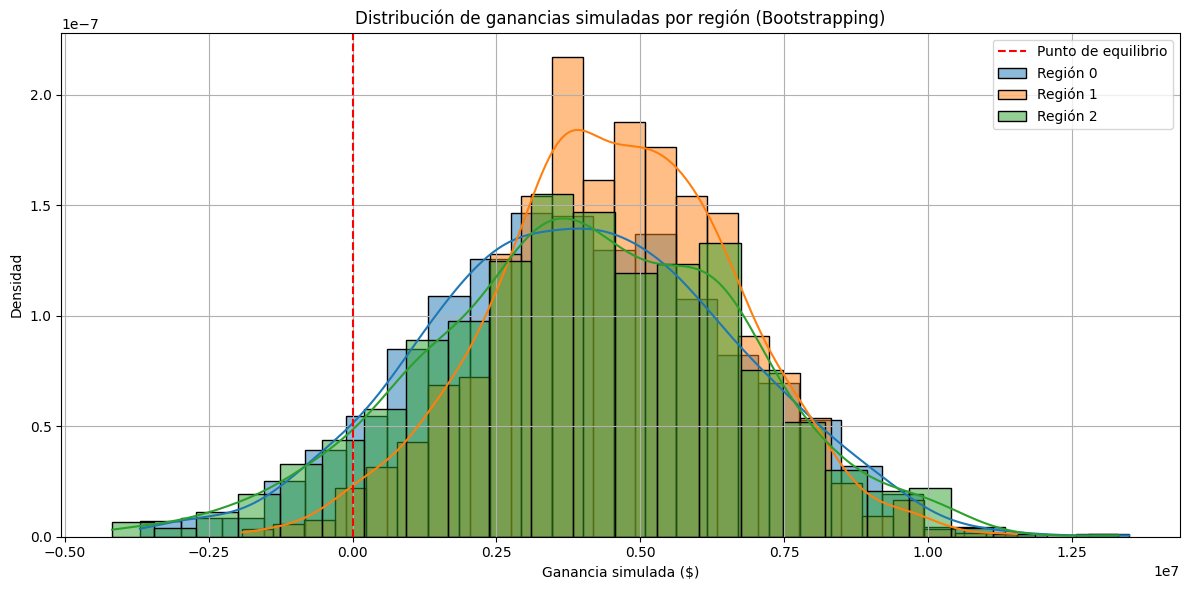

In [24]:
visual_bootstrap(final_region_evaluation)

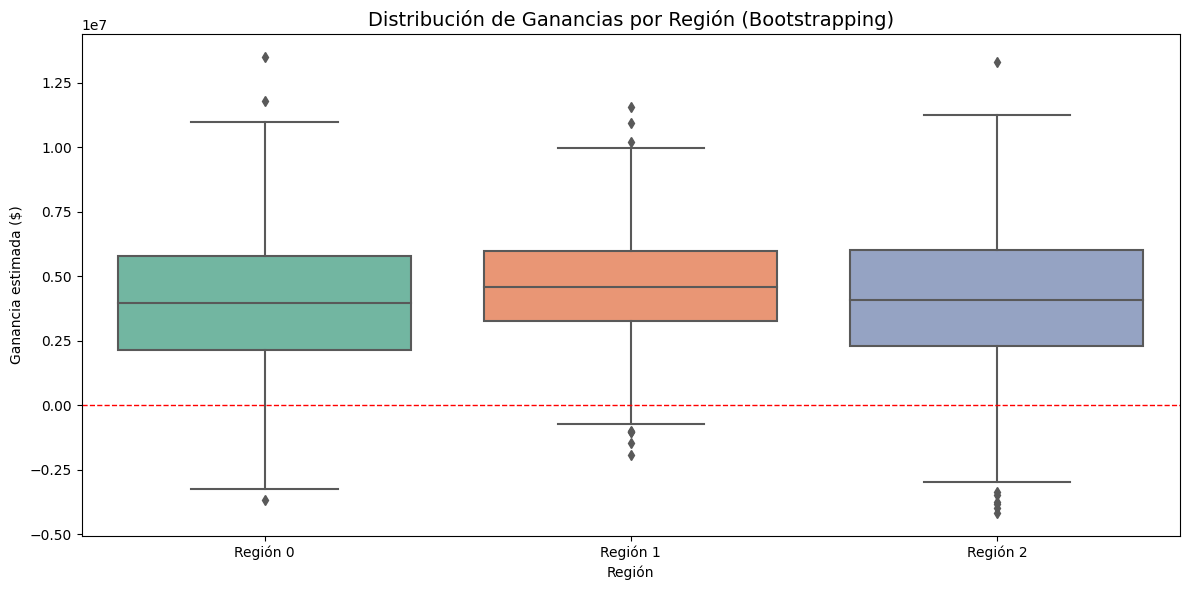

In [26]:
# Grafico con BoxPlot
region_boot = {}
for i, (region, results) in enumerate(final_region_evaluation.items()):
    region_boot[region] = results['profits_distribution']
# Crear DataFrame para graficar
boot_df = pd.DataFrame(region_boot)

# Convertir a formato largo para Seaborn
boot_df_long = boot_df.melt(var_name='Región', value_name='Ganancia ($)')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Región', y='Ganancia ($)', data=boot_df_long, palette='Set2')

# Línea de equilibrio (ganancia = 0)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Distribución de Ganancias por Región (Bootstrapping)', fontsize=14)
plt.ylabel('Ganancia estimada ($)')
plt.xlabel('Región')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy bien aplicada la técnica de bootstrapping. Has cuantificado la incertidumbre con claridad, incorporando métricas de dispersión y riesgo. La visualización es adecuada y permite tomar decisiones fundamentadas a partir del análisis probabilístico.  
</div>


### 5.3 Conclusiones
Presentar las conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección. ¿Coincide tu elección con la elección anterior en el punto 4.3?

#### Conclusiones Finales y Propuesta de Región
Para seleccionar la mejor región, debemos aplicar los criterios de negocio establecidos:

- Riesgo de pérdidas inferior al 2,5%.
- De las regiones que cumplen el criterio anterior, seleccione la que tenga el beneficio promedio más alto.

Analisis de cada región:

- __Región 0:__ Su riesgo de pérdidas es del 6.90%, lo cual es superior al umbral del 2.5% . Por lo tanto, descartamos la Región 0. Aunque su ganancia promedio es buena, el riesgo de perder dinero es demasiado alto.
- __Región 1:__ Su riesgo de pérdidas es del 1.50% , lo cual está por debajo del umbral del 2.5%. ¡Esta región es elegible! Su beneficio promedio es de $4,560,451.06. Notablemente, el límite inferior de su intervalo de confianza es positivo, lo que indica que, el 95% de las veces, esperamos obtener ganancias, sin pérdidas.
- __Región 2:__ Su riesgo de pérdidas es del 7.60%, lo cual es superior al umbral del 2.5%. Por lo tanto, descartamos la Región 2 . Al igual que la Región 0, el riesgo es inaceptable.

Basado en estos criterios, la __Región 1__ es la única que cumple con el requisito de riesgo de pérdidas. **Visualmenete los gráficos boxplot e histograma refuerzan nuestras afirmaciones.

**La Región 1 es la propuesta final para el desarrollo de pozos petrolíferos.**

- Beneficio Promedio Esperado: $4,560,451.06
- Intervalo de Confianza del 95%: [$338.205,09, $8.522.894,54]
- Riesgo de pérdidas: 1,50%

**Justificación de la Elección**

- Cumplimiento del Criterio de Riesgo: La Región 1 es la única que presenta un riesgo de pérdidas por debajo del 2.5% (específicamente, 1.50%), lo que la hace financieramente segura según las directrices de OilyGiant.
- Mayor Beneficio Promedio entre las Elegibles: Al ser la única región elegible, automáticamente ofrece el mayor beneficio promedio dentro de las opciones seguras.
- Intervalo de Confianza Positivo: El hecho de que el límite inferior del intervalo de confianza del 95% sea positivo ($338,205.09) es una señal muy fuerte de que es muy poco probable incurrir en pérdidas con la perforación en esta región, lo que aporta una gran tranquilidad.
- Coincidencia con la Precisión del Modelo: Recordemos que el modelo para la Región 1 tuvo un RMSE excepcionalmente bajo (0.89) en la Etapa 2. Esto significa que las predicciones del modelo para esta región son las más precisas, lo que se traduce directamente en una mayor confiabilidad de la selección de los pozos y, por ende, en un menor riesgo y un beneficio más estable.

**¿Coincide tu elección con la elección anterior en el punto 4.3?**

**No, la elección final (Región 1) NO coincide con la elección preliminar de la Etapa 4 (Región 0).**

- En la Etapa 4, la Región 0 fue seleccionada porque mostró la mayor ganancia puntual ($33.21 millones). Sin embargo, esta ganancia no consideró la variabilidad ni el riesgo.
- El análisis de bootstrapping en la Etapa 5 reveló que, a pesar de su alta ganancia puntual, la Región 0 tiene un riesgo de pérdidas inaceptablemente alto (6.90%).

Esta diferencia resalta la importancia crítica del análisis de riesgos utilizando bootstrapping . Una simple estimación de ganancia puntual puede ser engañosa. La Región 1, aunque con un beneficio promedio nominalmente menor, es significativamente más confiable y cumple con los requisitos de riesgo de la compañía, lo que la convierte en la opción estratégica superior para OilyGiant.



<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy bien argumentadas las conclusiones finales. El análisis de riesgo mediante bootstrapping se interpreta con claridad y fundamenta de forma sólida la decisión final. Se destaca la madurez analítica al priorizar estabilidad y confiabilidad sobre máximos puntuales.  
</div>


## Comentario general del revisor 



<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está <b>aprobado</b>. Has demostrado un excelente manejo de los datos, análisis exploratorio, y creación de modelos predictivos. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:  

#### Puntos Positivos:

* **Procesamiento de datos:** Muy clara y eficaz la validación inicial de los datasets. La función de exploración está bien estructurada y automatizada.
* **Visualización y análisis gráfico:** Utilizaste gráficos adecuados y bien diseñados para interpretar las distribuciones y los residuos, reforzando el análisis cuantitativo con visualizaciones intuitivas.
* **Ingeniería de características:** Aunque el modelo no requirió feature engineering complejo, el enfoque sobre variables predictoras fue correctamente seleccionado y justificado.
* **Comparación de modelos:** Excelente aplicación de regresión lineal con evaluación de desempeño mediante RMSE, y posteriormente complementado con análisis de riesgo y variabilidad por bootstrapping.

#### Áreas para Seguir Investigando:

* **Vectorización y optimización de código:** Considera explorar técnicas para optimizar el rendimiento en etapas de simulación como el bootstrapping.
* **Técnicas avanzadas de feature engineering:** Investigar transformaciones no lineales o interacciones entre variables que podrían mejorar la predicción en otras regiones.
* **Evaluación de modelos más complejos:** Podrías experimentar con modelos de árbol o ensambles como Random Forest o Gradient Boosting para comparar con la regresión lineal.
* **Manejo de desbalanceo en los datos:** Si en futuros proyectos los pozos rentables son una minoría, técnicas de selección como SMOTE pueden ayudar a modelar mejor los casos más relevantes.

¡Estás haciendo un gran trabajo!

</div>
